# Cars Case Study

- We will be doing a small case study on the Cars data set.
- We will be taking care of missing values.
- We will perform basic EDA
- We will then label encode the categorical data.
- We will then preporcess the data and divide the data set in traininig and testing parts.
- We will then create regression models for the data
- Check them for accuracy
- Hyperparameter Tuning of the regression models

### Importing required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

### Reading the Data Set

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


### Handling the missing values

In [4]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
168     5
85      5
74      5
102     5
103     5
65      5
94      5
95      5
93      4
106     4
118     4
148     4
122     4
125     3
83      3
154     3
115     3
137     3
101     3
108     2
119     2
188     2
129     2
81      2
197     2
158     2
89      2
110     2
164     2
194     2
87      2
192     2
153     2
113     2
145     2
121     1
90      1
142     1
77      1
256     1
186     1
98      1
231     1
107     1
78      1
Name: normalized-losses, dtype: int64

In [5]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
160     6
114     6
88      6
101     6
62      6
84      5
102     5
82      5
145     5
76      5
97      5
111     4
123     4
92      4
86      4
73      3
85      3
121     3
152     3
182     3
207     3
90      3
52      2
161     2
176     2
162     2
56      2
184     2
112     2
94      2
100     2
156     2
?       2
155     2
120     1
154     1
135     1
134     1
48      1
64      1
262     1
200     1
106     1
72      1
55      1
288     1
143     1
115     1
140     1
58      1
60      1
175     1
142     1
78      1
Name: horsepower, dtype: int64

<AxesSubplot:>

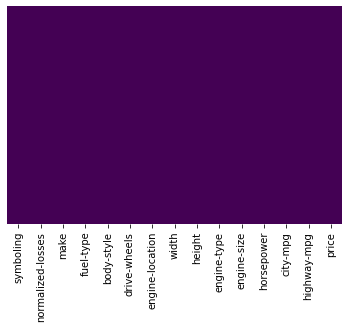

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df['normalized-losses'] = df['normalized-losses'].replace('?',np.nan).astype('float')

In [8]:
df['horsepower'] = df['horsepower'].replace('?',np.nan).astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


<AxesSubplot:>

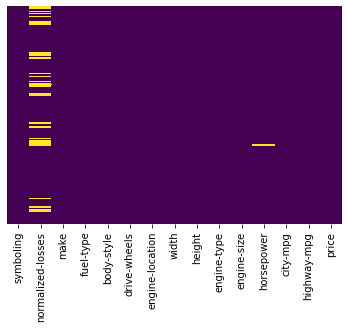

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
l = list(df['make'].value_counts().index)

In [12]:
nlmed = []
for i in l:
    nlmed.append(df[df['make']==i]['normalized-losses'].median())

In [13]:
nlmed

[91.0,
 128.0,
 115.0,
 101.0,
 153.0,
 89.0,
 94.0,
 95.0,
 161.0,
 145.0,
 190.0,
 93.0,
 161.0,
 136.5,
 127.0,
 186.0,
 nan,
 nan,
 98.0,
 145.0,
 nan,
 nan]

In [14]:
nlmed = [df['normalized-losses'].mean() if x != x else x for x in nlmed]

In [15]:
nlmed

[91.0,
 128.0,
 115.0,
 101.0,
 153.0,
 89.0,
 94.0,
 95.0,
 161.0,
 145.0,
 190.0,
 93.0,
 161.0,
 136.5,
 127.0,
 186.0,
 122.0,
 122.0,
 98.0,
 145.0,
 122.0,
 122.0]

In [16]:
def fillnl(cols,nlmed,l):
    nl = cols[0]
    make = cols[1]
    for i in range(0,22):
        if pd.isnull(nl):
            if make==l[i]:
                return nlmed[i]
        else:
            return nl

In [17]:
df['normalized-losses'] = df[['normalized-losses','make']].apply(fillnl, axis=1, args=(nlmed,l))

In [18]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

<AxesSubplot:>

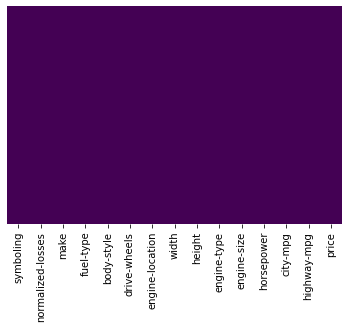

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


### EDA

In [21]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,125.465854,65.907805,53.724878,126.907317,104.256158,25.219512,30.751220,13227.478049
std,1.245307,35.609935,2.145204,2.443522,41.642693,39.519211,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,153.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


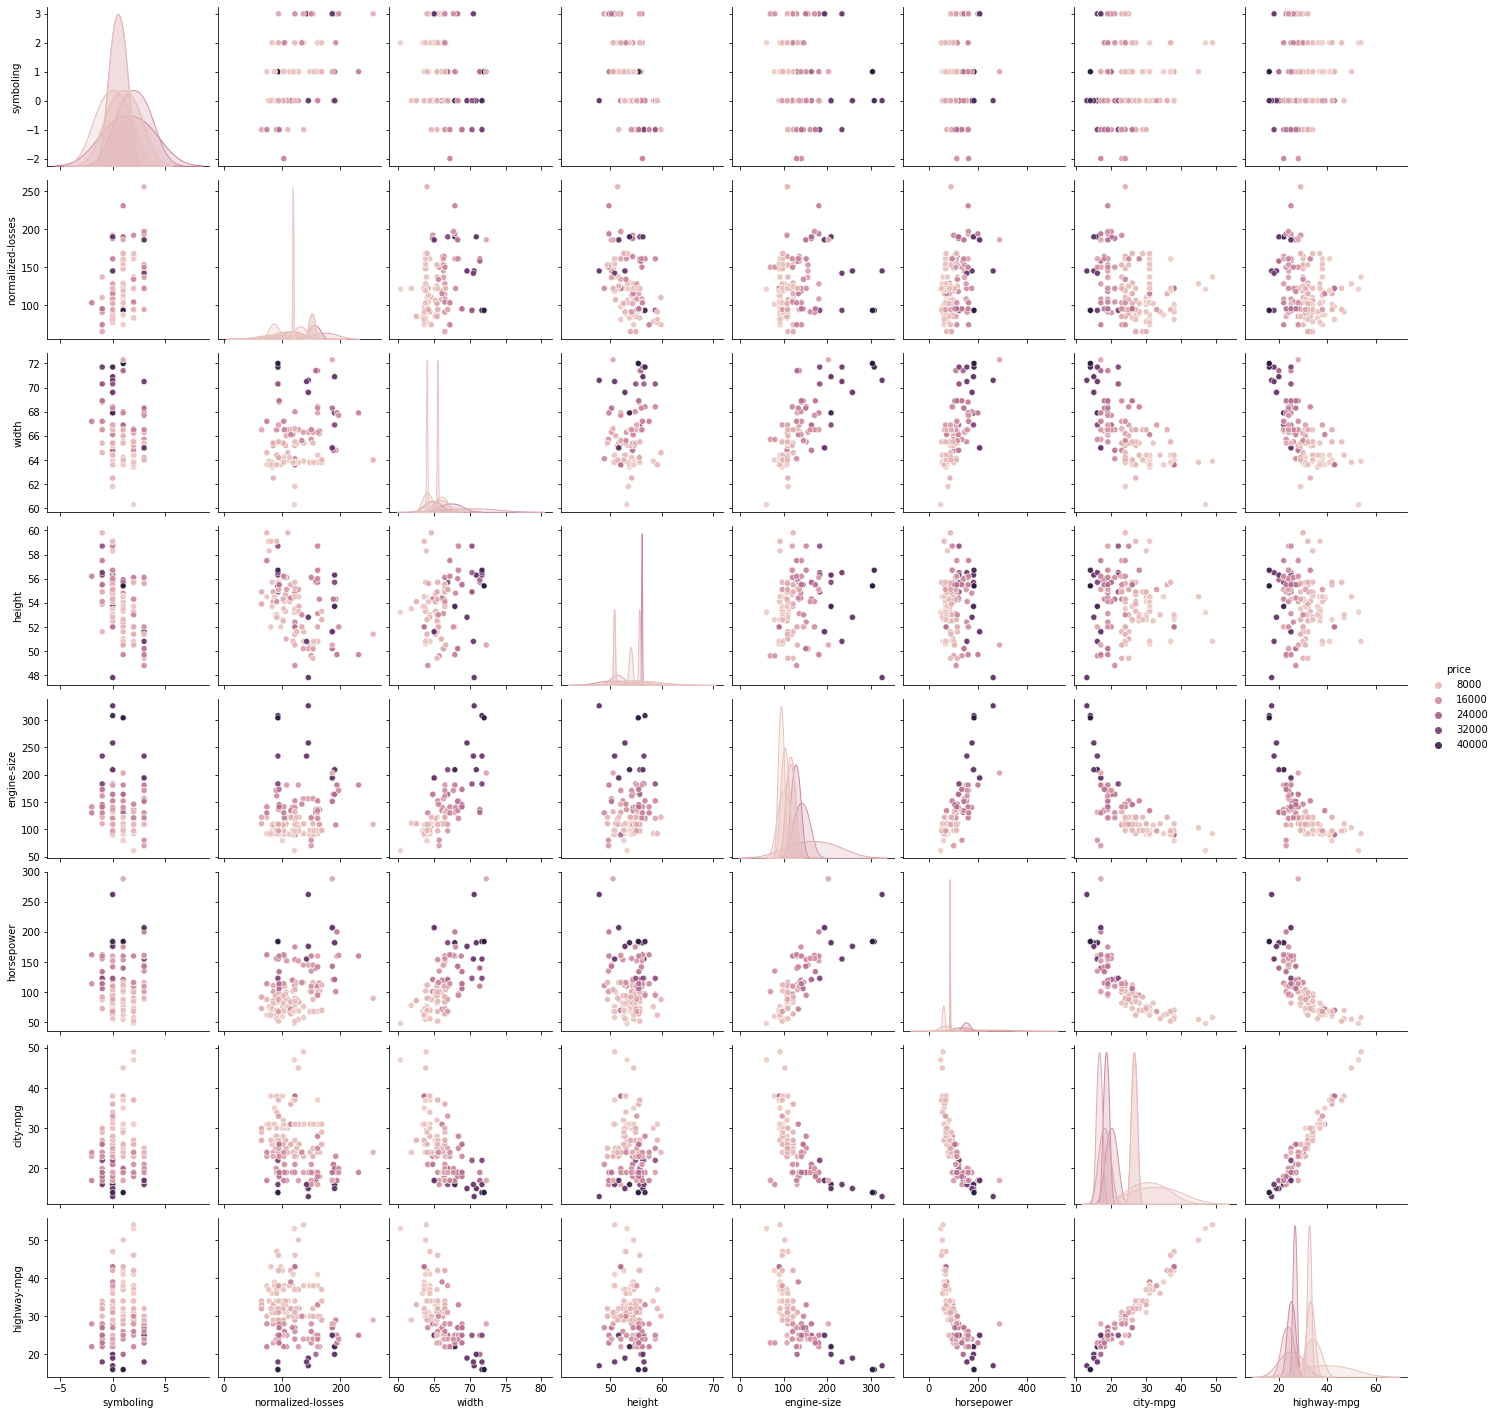

In [22]:
sns.pairplot(df,hue='price')

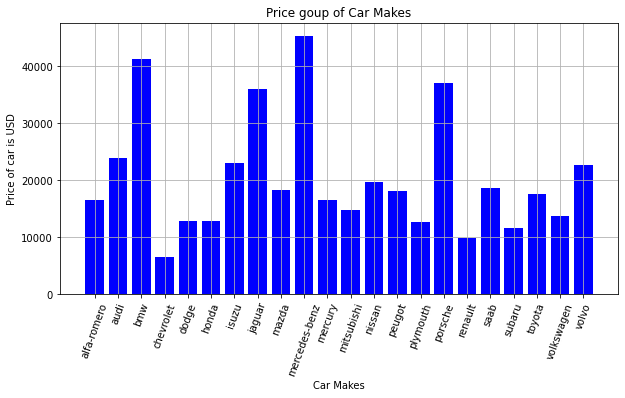

In [23]:
fig = plt.figure(figsize = (10, 5))
plt.bar('make','price',data = df, color='blue')
plt.xticks(rotation=70)
plt.xlabel('Car Makes')
plt.ylabel('Price of car is USD')
plt.title('Price goup of Car Makes')
plt.grid()
plt.show()

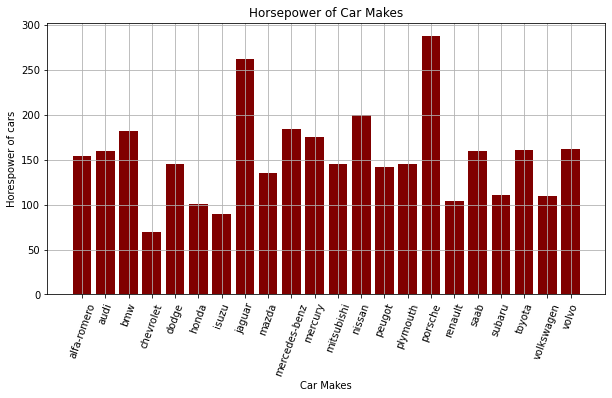

In [24]:
fig = plt.figure(figsize = (10, 5))
plt.bar('make','horsepower',data = df, color='maroon')
plt.xticks(rotation=70)
plt.xlabel('Car Makes')
plt.ylabel('Horespower of cars')
plt.title('Horsepower of Car Makes')
plt.grid()
plt.show()

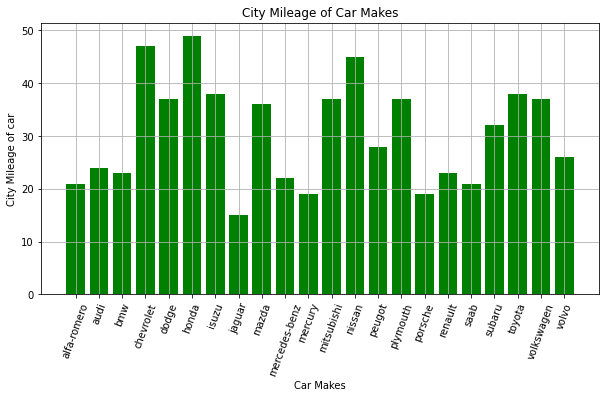

In [25]:
fig = plt.figure(figsize = (10, 5))
plt.bar('make','city-mpg',data = df, color='green')
plt.xticks(rotation=70)
plt.xlabel('Car Makes')
plt.ylabel('City Mileage of car')
plt.title('City Mileage of Car Makes')
plt.grid()
plt.show()

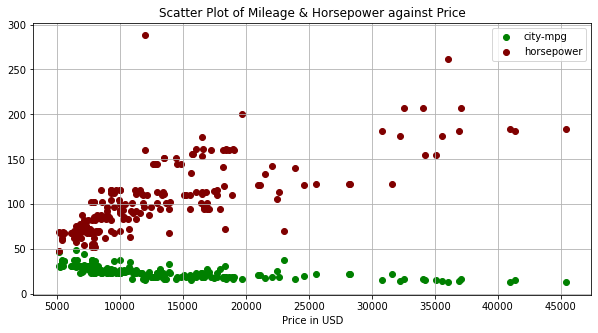

In [26]:
fig = plt.figure(figsize = (10, 5))
plt.scatter('price','city-mpg',data = df, color='green')
plt.scatter('price','horsepower',data = df, color='maroon')
plt.title('Scatter Plot of Mileage & Horsepower against Price')
plt.xlabel('Price in USD')
plt.legend()
plt.grid()
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

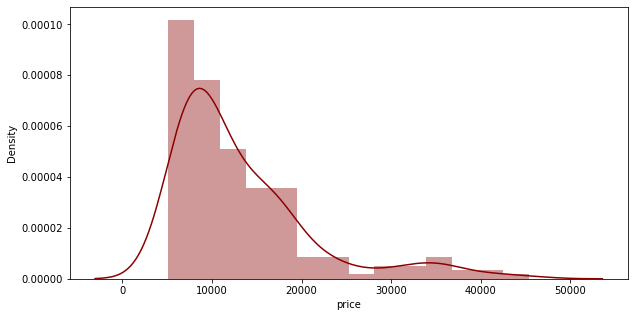

In [27]:
fig = plt.figure(figsize = (10, 5))
sns.distplot(df['price'].dropna(),color='darkred')

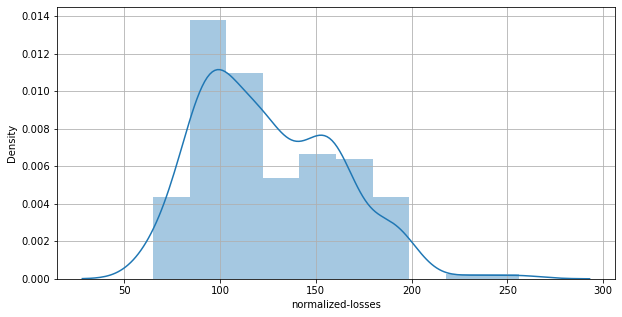

In [28]:
fig = plt.figure(figsize = (10, 5))
sns.distplot(df['normalized-losses'])
plt.grid(True)

### Handling the Outliers

<AxesSubplot:xlabel='price', ylabel='make'>

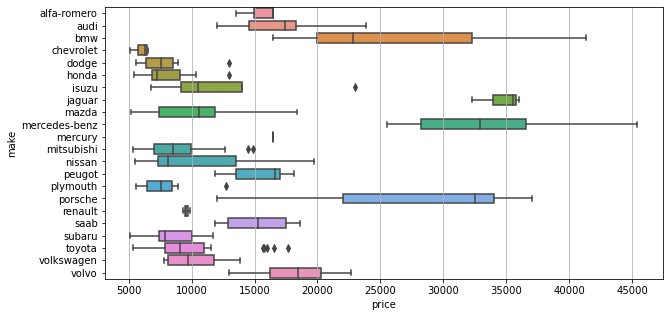

In [29]:
plt.figure(figsize = (10,5))
plt.grid(True)
sns.boxplot(data=df, x='price', y='make')

In [30]:
df[(df['make']=='dodge')&(df['price']>11000)]
df.drop(29, inplace=True)

In [31]:
df[(df['make']=='isuzu')&(df['price']>20000)]
df.drop(45, inplace=True)

In [32]:
df[(df['make']=='honda')&(df['price']>11000)]
df.drop(41, inplace=True)

In [33]:
df[(df['make']=='mitsubishi')&(df['price']>14000)]
df.drop([83,84], inplace = True)

In [34]:
df[(df['make']=='plymouth')&(df['price']>10000)]
df.drop(124, inplace = True)

In [35]:
df[(df['make']=='toyota')&(df['price']>15000)]
df.drop([172,178,179,180,181], inplace = True)

<AxesSubplot:xlabel='price', ylabel='make'>

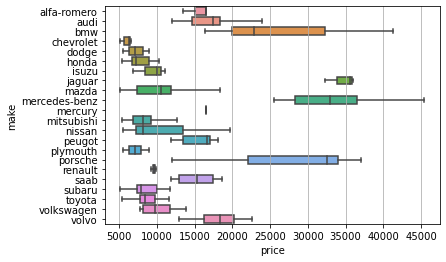

In [36]:
#plt.figure(figsize = (12,12))
plt.grid()
sns.boxplot(data=df, x='price', y='make')

### Preprocessing

In [37]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(['int64', 'float64'])

In [38]:
for col in df_cat:
    le =LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [39]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [40]:
df = pd.concat([df_cat,df_num],axis=1)

In [41]:
df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [42]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state=45)

### Making Models

In [44]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    r2 = r2_score(ytest,ypred)
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    print(f'R2_score      : {r2}\nMAE      : {mae}\nMSE      : {mse}\nRMSE      :{rmse}')

In [45]:
models = []

models.append(('linreg        :', LinearRegression()))
models.append(('KNN           :', KNeighborsRegressor()))
models.append(('SVM-r         :', SVR(kernel='rbf')))


for name, model in models:
    print(name)
    mymodel(model)
    print('\n\n\n')

linreg        :
R2_score      : 0.8551424088173839
MAE      : 2205.7100535934724
MSE      : 7517849.368444724
RMSE      :2741.869684803551




KNN           :
R2_score      : 0.8555568546035045
MAE      : 1991.9491525423732
MSE      : 7496340.374915255
RMSE      :2737.9445529293057




SVM-r         :
R2_score      : -0.13120305037558855
MAE      : 4897.110780724725
MSE      : 58707410.97115129
RMSE      :7662.076152789875






### Hyperparameter Tuning

In [46]:
accuracy=[]
for i in range(1,31):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    accuracy.append(r2_score(ytest,ypred))

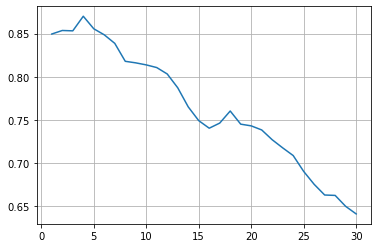

In [47]:
plt.plot(range(1,31),accuracy)
plt.grid()

In [48]:
li2=[]
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    li2.append((i,l2.score(xtest,ytest)))
li2

[(0, 0.8551424088173828),
 (1, 0.8504811017422029),
 (2, 0.8471364595746127),
 (3, 0.8449880146892852),
 (4, 0.8435778581705318),
 (5, 0.842627713244634),
 (6, 0.8419749009022854),
 (7, 0.8415208684546157),
 (8, 0.8412034023518902),
 (9, 0.84098177181416),
 (10, 0.8408284835780339),
 (11, 0.8407245044700069),
 (12, 0.8406563799396403),
 (13, 0.840614433348096),
 (14, 0.8405916053379787),
 (15, 0.8405826854174726),
 (16, 0.8405837911996094),
 (17, 0.840592008207766),
 (18, 0.8406051362419791),
 (19, 0.8406215079423467),
 (20, 0.8406398571751097),
 (21, 0.8406592223701446),
 (22, 0.840678874740982),
 (23, 0.8406982644552632),
 (24, 0.8407169799104872),
 (25, 0.8407347166818113),
 (26, 0.8407512536785215),
 (27, 0.840766434721402),
 (28, 0.8407801542299035),
 (29, 0.8407923460483229),
 (30, 0.8408029746857917),
 (31, 0.8408120284239161),
 (32, 0.8408195138776424),
 (33, 0.8408254516926775),
 (34, 0.8408298731359463),
 (35, 0.8408328173906874),
 (36, 0.8408343294096332),
 (37, 0.8408344582

In [64]:
li1=[]
for i in range(0,100):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    li1.append((i,l1.score(xtest,ytest)))
li1

[(0, 0.8551424088173823),
 (1, 0.8550095630088226),
 (2, 0.8548750596287074),
 (3, 0.8547388978305653),
 (4, 0.8546010842188183),
 (5, 0.8544616095238569),
 (6, 0.8543204794929734),
 (7, 0.8541777000761801),
 (8, 0.854033233592878),
 (9, 0.8538871443436035),
 (10, 0.8538016706844958),
 (11, 0.8537443177873975),
 (12, 0.8536859824677296),
 (13, 0.8536265791673524),
 (14, 0.8535661096521752),
 (15, 0.8535045751545087),
 (16, 0.8534419761318537),
 (17, 0.8533783128865536),
 (18, 0.8533135854885238),
 (19, 0.8532477941626228),
 (20, 0.8531810819342035),
 (21, 0.8531131684822166),
 (22, 0.8530441912245067),
 (23, 0.8529743036652155),
 (24, 0.8529032053355172),
 (25, 0.8528310434572455),
 (26, 0.8527579884282085),
 (27, 0.8526837217880968),
 (28, 0.8526083944325281),
 (29, 0.8525321778597583),
 (30, 0.8524547341986106),
 (31, 0.8523762147622092),
 (32, 0.8522968105940577),
 (33, 0.8522161688549168),
 (34, 0.8521344642637525),
 (35, 0.8520518891336136),
 (36, 0.851968066690362),
 (37, 0.85188

In [50]:
models = []

models.append(('linreg        :', LinearRegression()))
models.append(('KNN           :', KNeighborsRegressor(n_neighbors=4)))
models.append(('SVM-r         :', SVR(kernel='linear')))


for name, model in models:
    print(name)
    mymodel(model)
    print('\n\n\n')

linreg        :
R2_score      : 0.8551424088173839
MAE      : 2205.7100535934724
MSE      : 7517849.368444724
RMSE      :2741.869684803551




KNN           :
R2_score      : 0.8700732246041563
MAE      : 1960.1610169491526
MSE      : 6742966.788135593
RMSE      :2596.722316331801




SVM-r         :
R2_score      : 0.8339411696354279
MAE      : 2084.2371527133146
MSE      : 8618155.685104236
RMSE      :2935.669546305278






### Cross Validation Score

In [51]:
cvs = cross_val_score(LinearRegression(),x,y, cv=4)
cvs

array([0.73132121, 0.85018951, 0.35883977, 0.38099137])

In [52]:
cvs.mean()

0.5803354660467451

In [53]:
cvs = cross_val_score(l2,x,y, cv=4)
cvs

array([0.85272038, 0.82646916, 0.49787261, 0.29365236])

In [54]:
cvs.mean()

0.617678625889969

In [55]:
cvs = cross_val_score(l1,x,y, cv=4)
cvs

array([0.82244353, 0.81832091, 0.39723616, 0.30848279])

In [57]:
cvs.mean()

0.586620848217697

In [58]:
cvs = cross_val_score(KNeighborsRegressor(n_neighbors=4),x,y, cv=4)
cvs

array([0.86501939, 0.75647446, 0.42877767, 0.35381658])

In [60]:
cvs.mean()

0.6010220229139285

In [61]:
cvs = cross_val_score(SVR(kernel='linear'),x,y, cv=4)
cvs

array([0.84813027, 0.81809931, 0.61399363, 0.40028142])

In [62]:
cvs.mean()

0.6701261583851267